In [38]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style

import seaborn as sns

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score

# What is SciKit Learn?

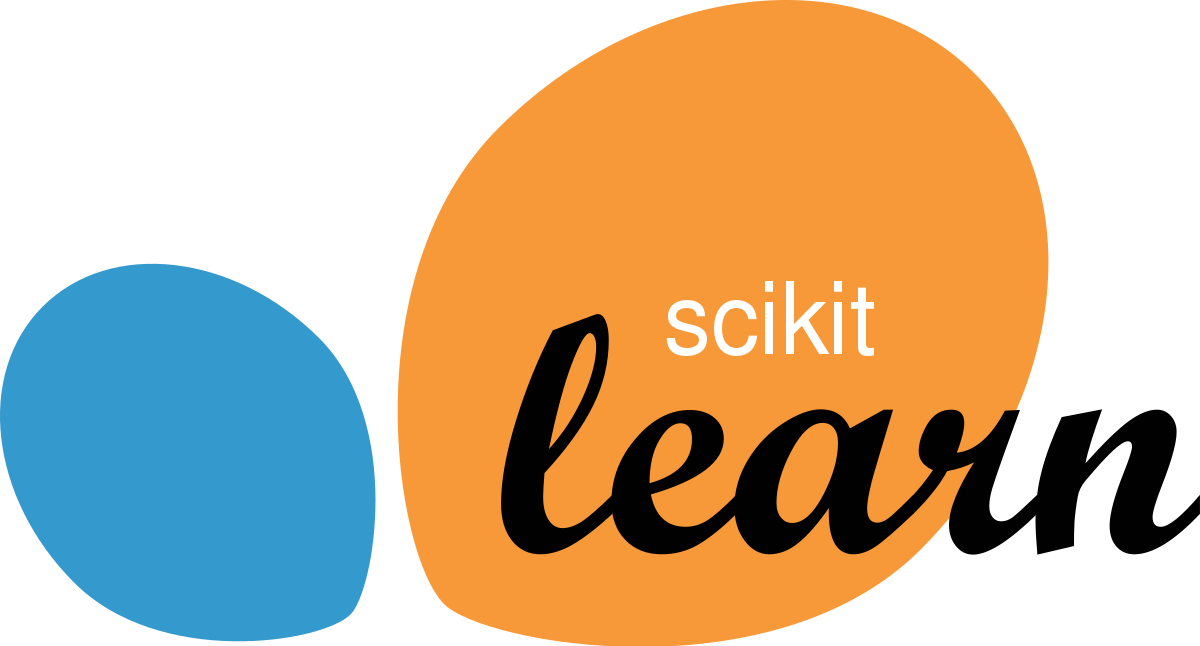

[14]

SciKit Learn is a free library in python which contains a vast number of packages which can be used for Machine Learning. In this project I will use SciKit Learn to emplain what machine learning is, and give some examples of it use to display how amazing a tool it can be for processing data which can be incredibly complex and difficult to understand.

Since SciKit Learn is basically a Machine Learning Library, I will just explain what machine learning is. From seeing what Machine Larning is capable of, we will see what SciKit learn is capable of, as both are one and the same.

# What is Machine Learning?

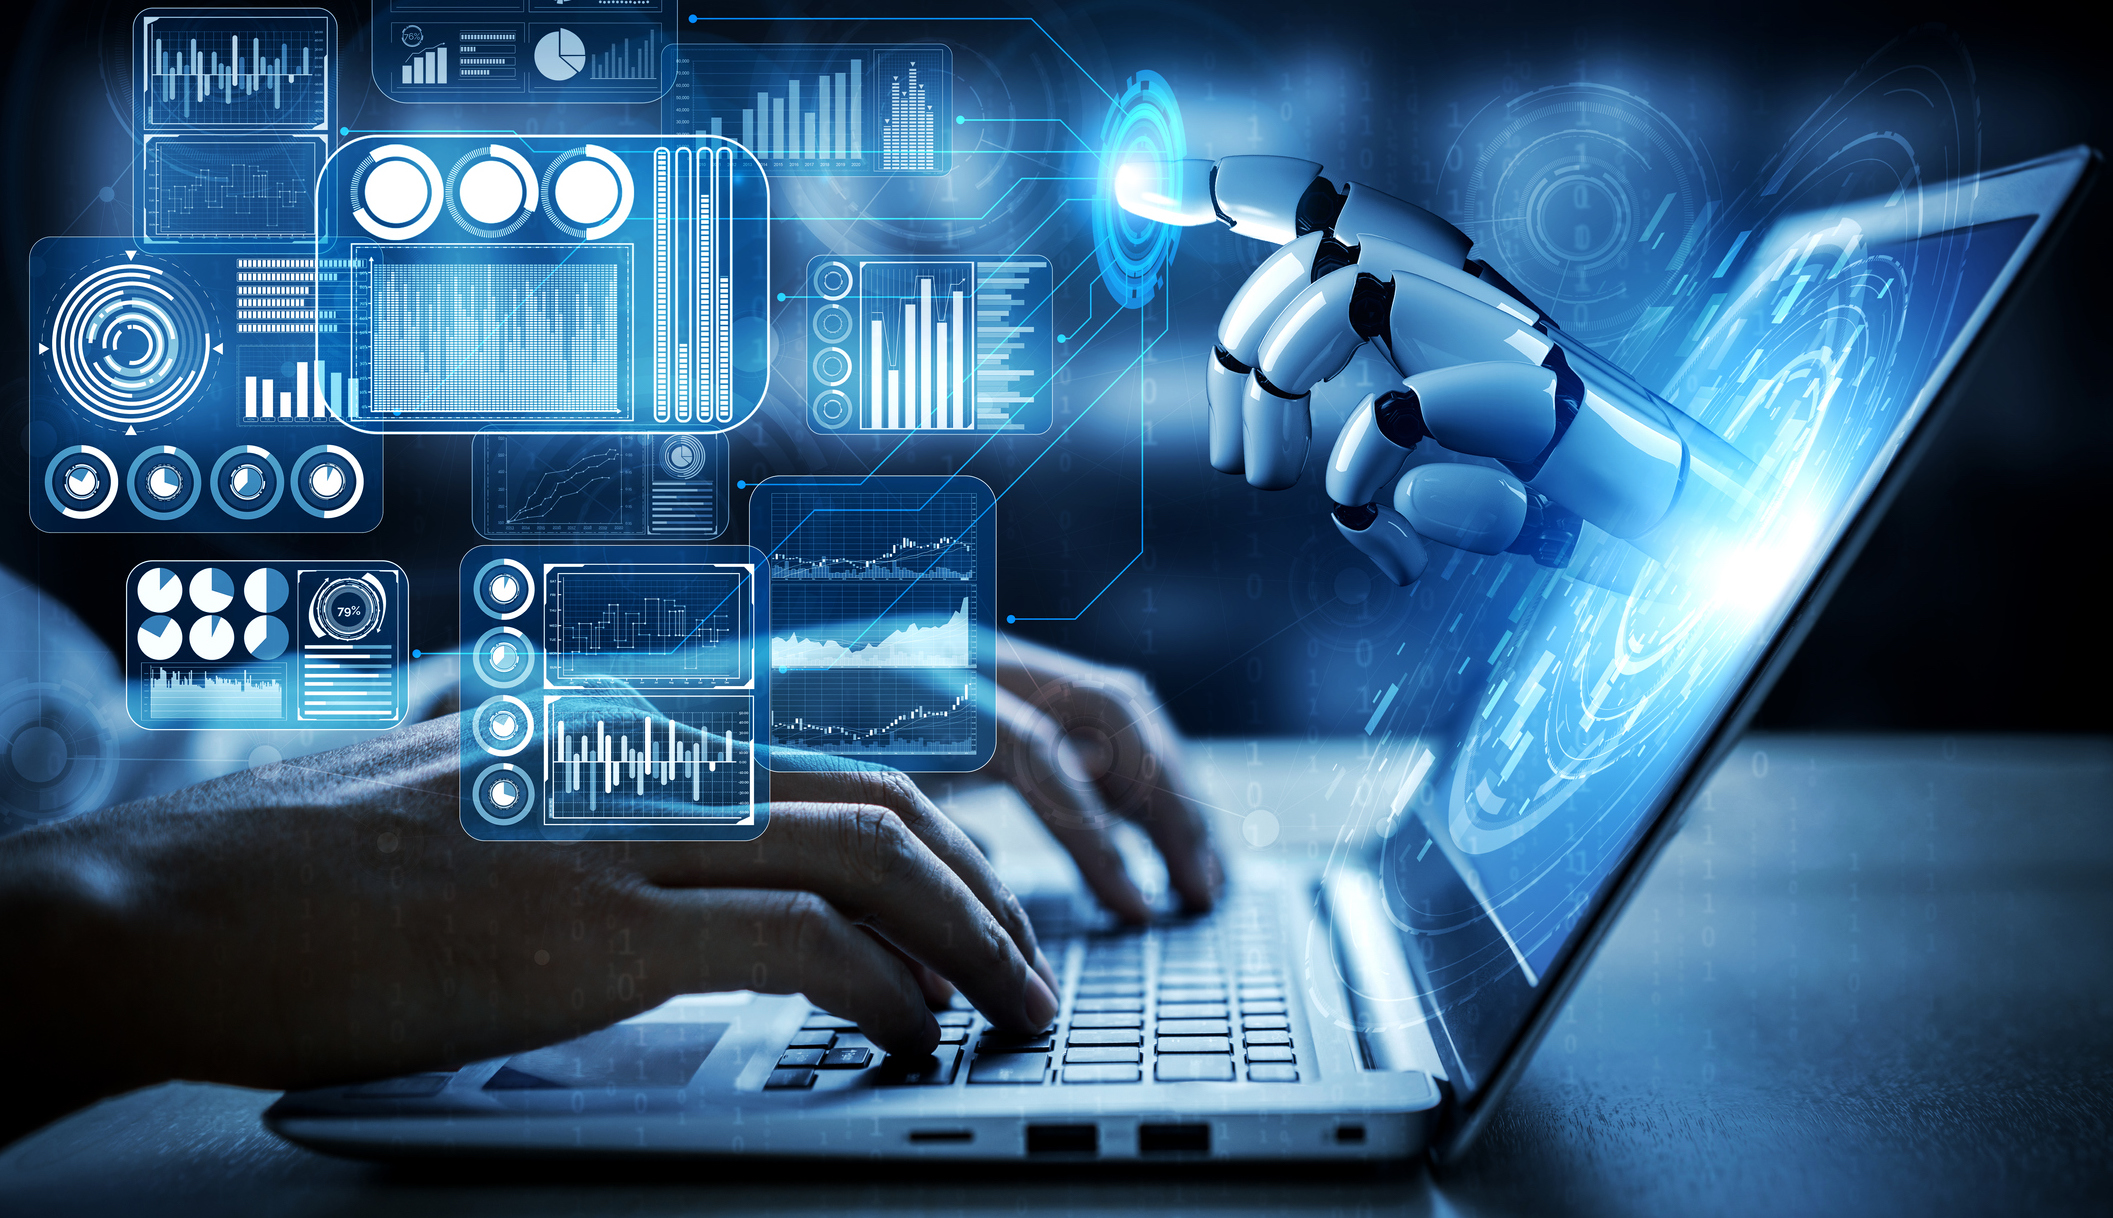

[13]

Machine Learning is a branch of artificial intelligence and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, by gradually improving their accuracy.

Another way to describe it is it is a school of computer sciece where we use algorithms to analyse the nature and behaviour of data, and from this analysis we can build a model of understanding about that data. We can then use this model to make predictions about new data, based on what we already know.

There are many subsets of Machine learning, but it is generally agreed to be broken into two main categories:

#### Supervised & Unsupervised Learning algorithms:

**Spervised Learning Algrithms** are used by taking a set of data where we already know a set of outcomes and using this to 'train' the algorithm. The algorithm takes the previously given inputs and outputs and analyses the relationships between the two. We can then  give the algorithm a new inputm ad it should be able to give a good guess at what the outcome should be.

Supervised learning is further classified into Regression, Classification, Forecasting and Anomoly detection.


**Unsupervised Learning** are used when we do not have a set reponse variables for our input. Basically here we would have a set of raw data, such as a large dataset of genetic information, and the algorithm is set to try and find hidden relationships and structues withing the data itslef. Exaples of this would be CLustering and Dimensional reduction. [11]


In this project I will focus on 3 (or technically 4) different Classification algorithms: K-Nearest Neighbors, Decision Trees, Random Forests and Stochastic Gradient Descent. I will use each one on the same dataset and thus compare their performance accordingly.

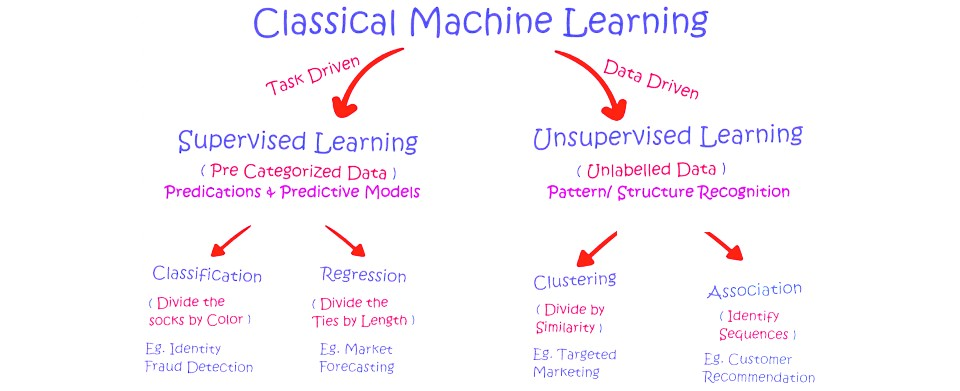

Configure plot appearance: [1]

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [3]:
# Reading data:

In [4]:
# Load Wine Quality data set from folder: [3]
df = pd.read_csv("winequality-red.csv", delimiter=';')

# Look at the data:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [5]:
# Summary of statisics:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
#Check for null values and clean data: (There are no null values)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Initial Visual analysis:

Here we use a for loop to iterate through every collumn and compare them to the last collumn; quality. We then create an individual scatter plot for each of them so that we can see the relationships between each attribute and the quality of the wine.

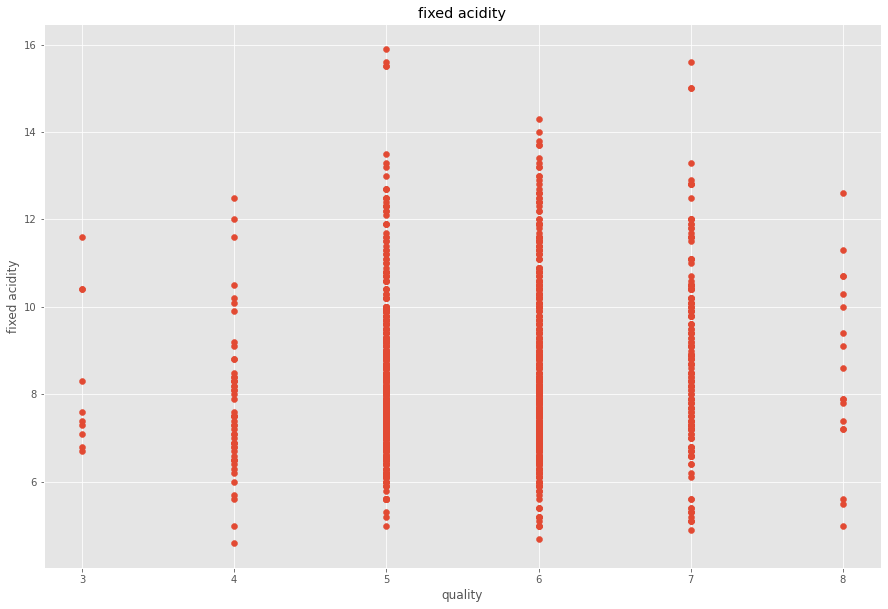

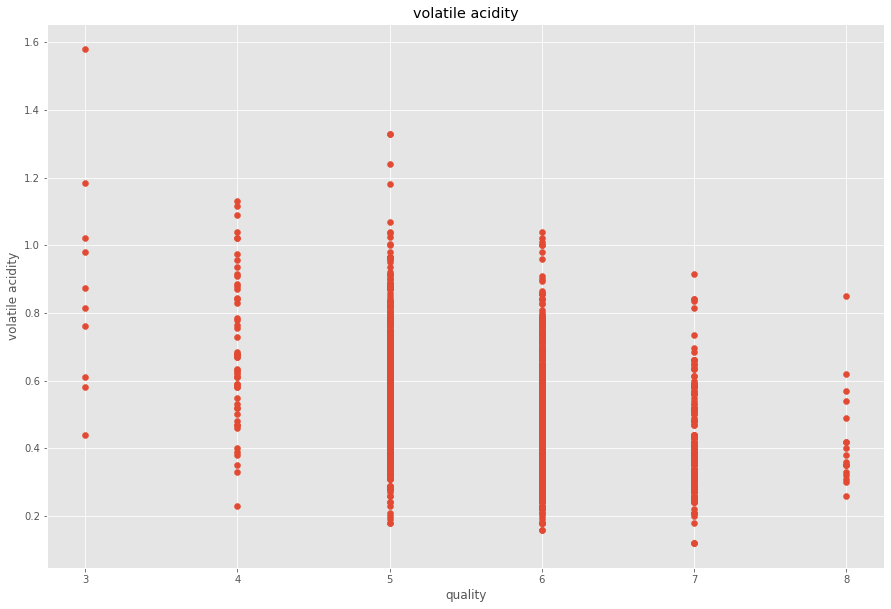

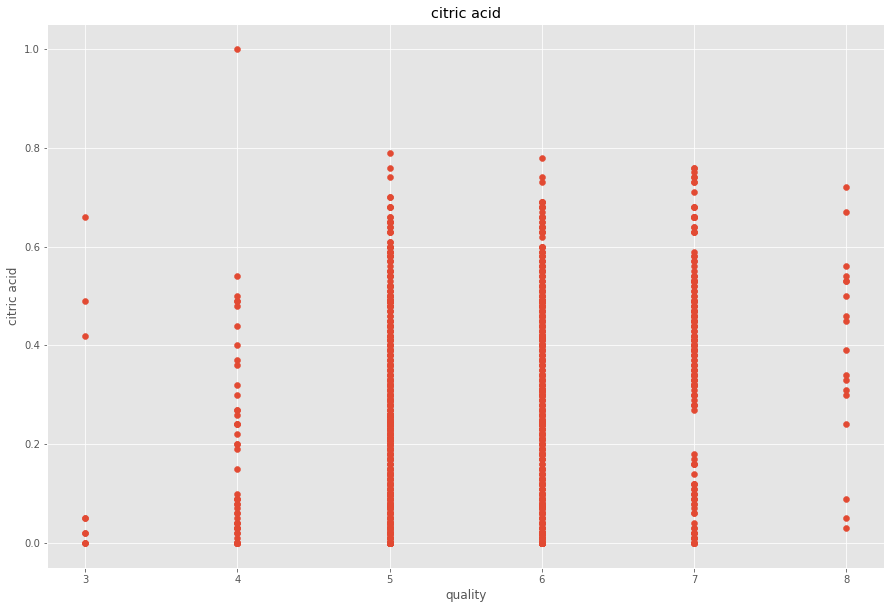

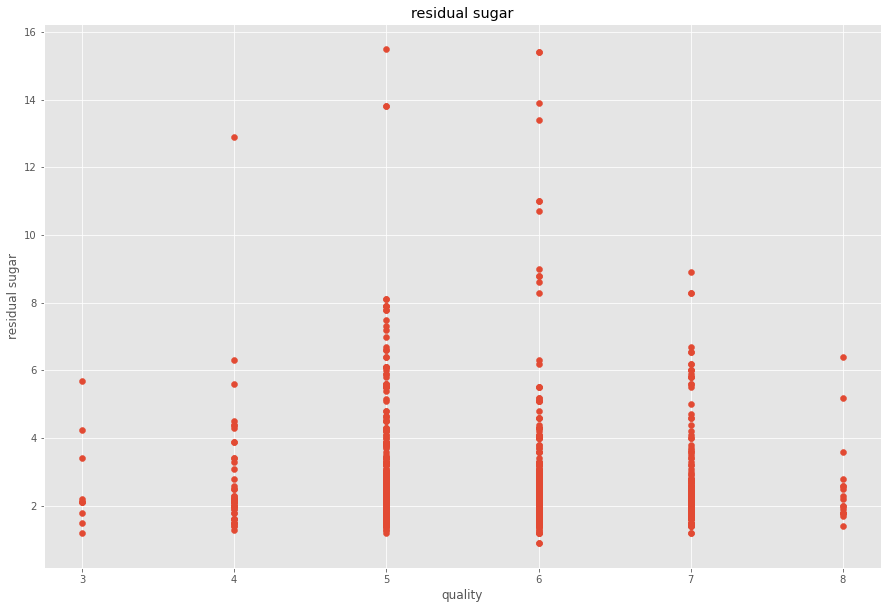

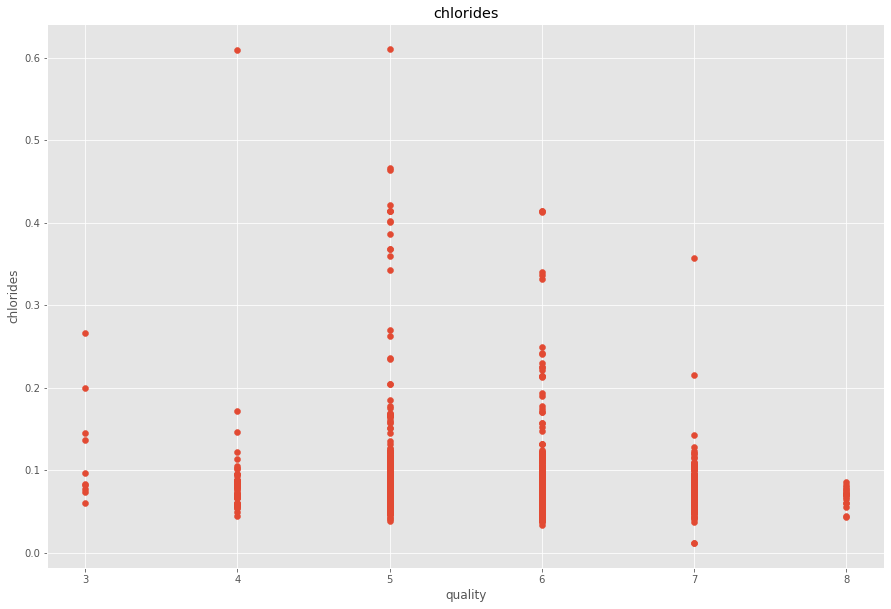

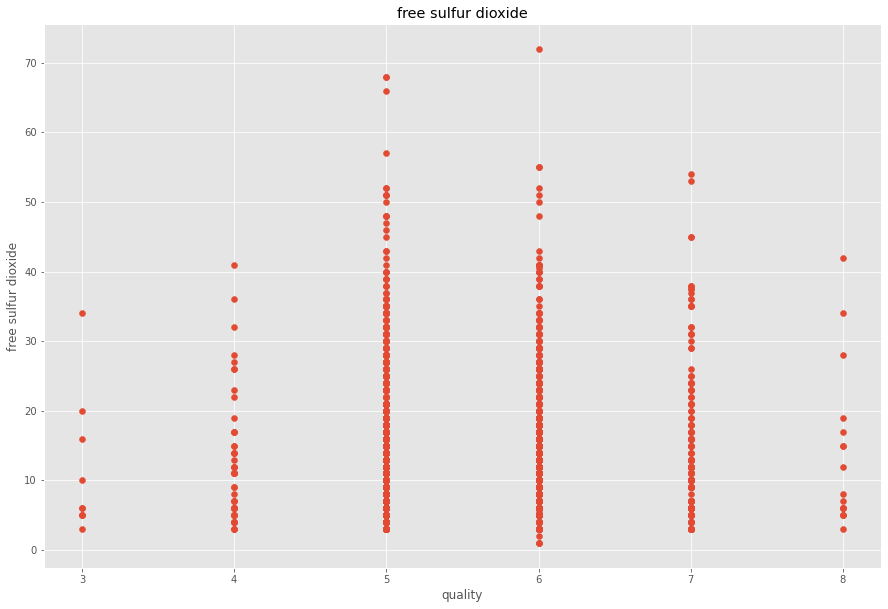

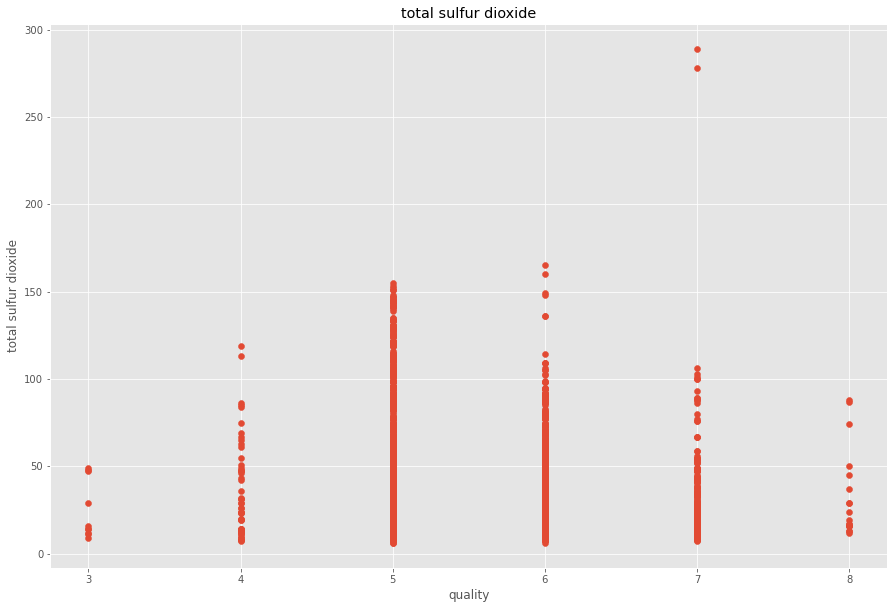

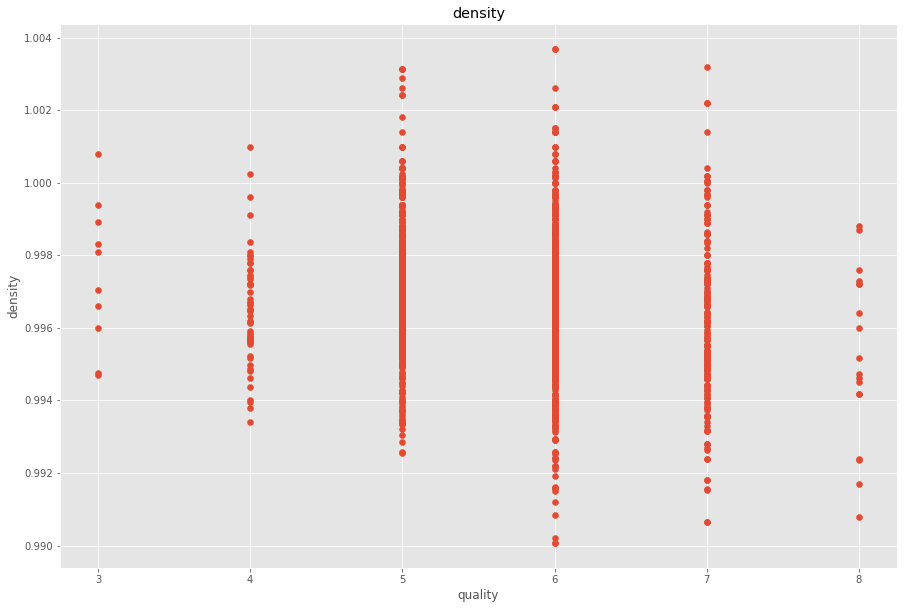

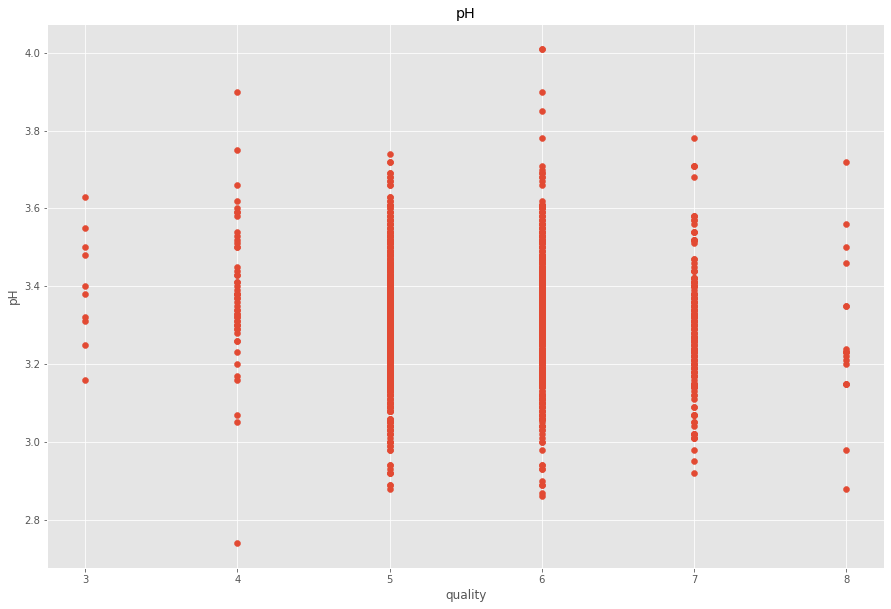

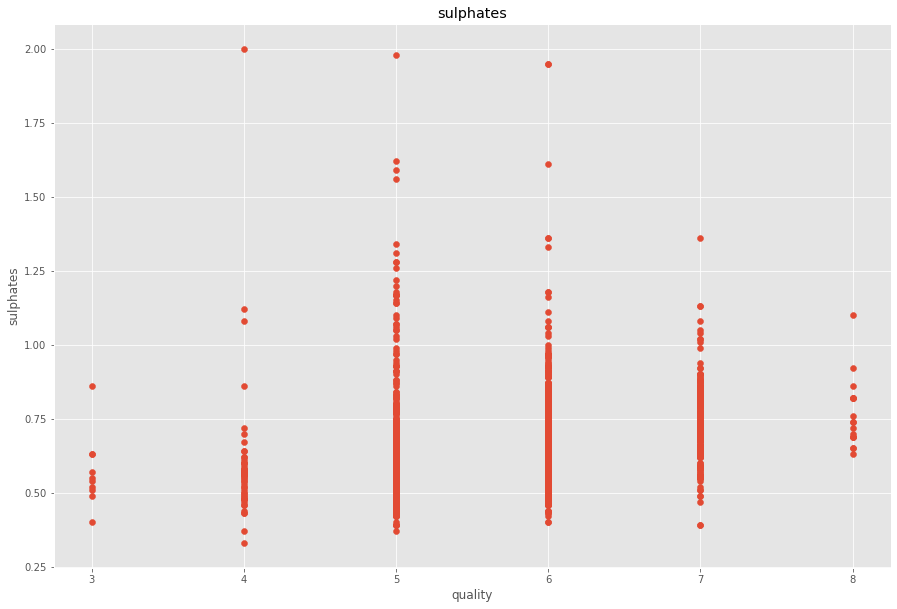

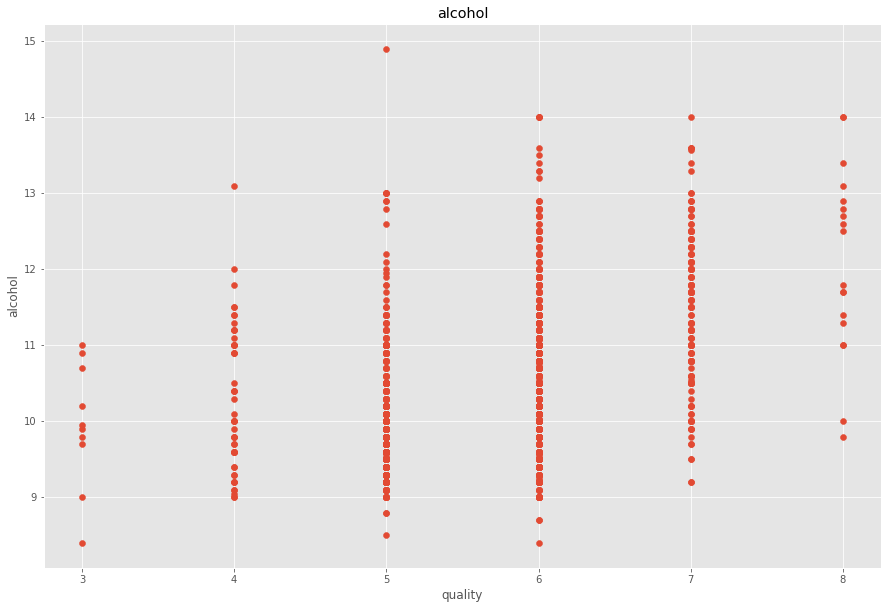

In [6]:
for label in df.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()
    
# [4]

From the above plots we can see that there is no real definitive pattern appearing based on any one attribute of the dataset from which we could draw a clear conclusion from.

We can also see that there are no wines that rate higher or lower than range 3-9.

As a result, we will now implement some machine learning techniques to better classify the quality of these wines based on more than one feature being compared against quality simultaneaously through a variety of methods.

## Splitting the data:

divide the data up into training and testing data.

In [7]:
# To make the qualification a bit simpler, we can create bins to divide the 
# range 3-9 into 3 broader classes:
# low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5.5 are low, 5.5-7.5 are mid, 7.5-9 are high
# label these classes usinng 0,1,2 to correspond with above class names.
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### Next we define our inputs and ouputs:

In [8]:
# Set x as inputs, all collumns except for the quality:
x = df[df.columns[:-1]]

# Set Y as output - quality:
y = df['quality']

## Standardization

Now we standardize the data to fit our classification algorithms:

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. [6]

StandardScaler changes each feature column f:,i to:

$$f'_{:,i} = \frac{f_{:,i} - mean(f_{:,i})}{std(f_{:,i})}.$$
[5]


Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values. [7]

To illustrate, consider data set:

{1,2,3,4,5} 

which consists of 5 one dimensional data points (each data point has one feature),
After applying StandardScaler, data set becomes:

{−1.41,−0.71,0.,0.71,1.41}.

[6]

In [9]:
# Standardise data:
sc = StandardScaler()

In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently of each feature. 

fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data. [7]

In [10]:
x = sc.fit_transform(x)

In [11]:
# Create training & testing set variables:
# test_size=.2 - 20% of set will be used as test data, vs 80% training data.
# Random state standardised to reproduce data later.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=55)

In [12]:
# Summarize data
for data in [y_train, y_test]:
    print(data.describe())

count     1279
unique       3
top          1
freq       665
Name: quality, dtype: int64
count     320
unique      3
top         1
freq      172
Name: quality, dtype: int64


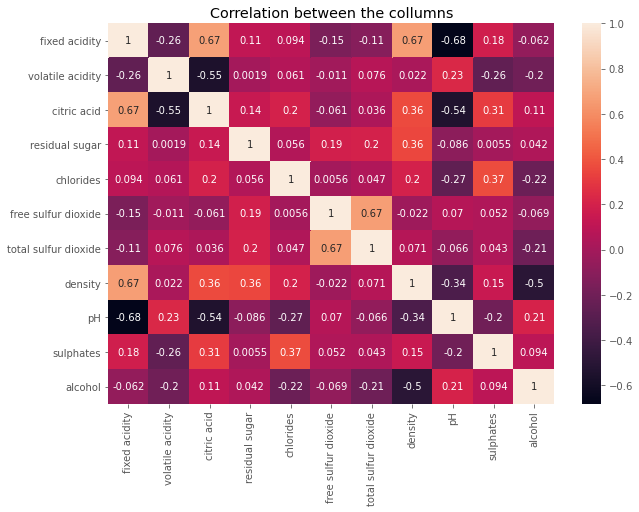

In [33]:
#Have a look at the correlations between values:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the collumns')
plt.show()

## Classification

#### What is a classifier? 

Basically it is something that takes in an item and based on given data aassigns a class to it from a given set of classes. 

In this case our classes are low, medium and high quality wines.

..## K Nearest Neighbors:

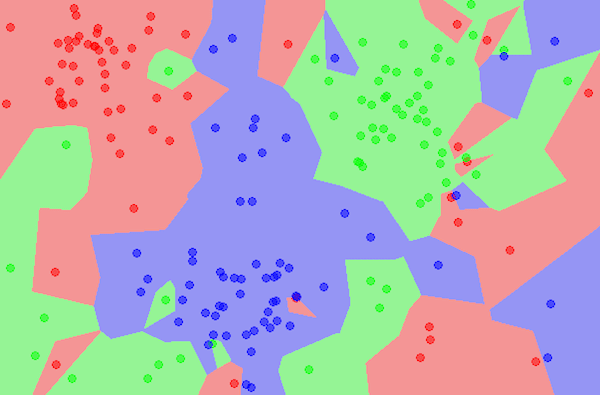

Looks at a given point and checks it's nearest 'K' neighbors. (The value of K can be set to however many you like)

Let's say we chose a value of K to be 5 - If the majority of the nearest neighbors is one partcular colour, the algorithm assumes the item in question falls under the same category.

As you can see with the above image, there are often many fringe cases where points of one color will exist independantly within a cluster of another. These outliers are what makes classification more complex than just drawing a line, however when this same concept is applied to an array of dimensions simultaneously these grey areas can be classified much more effectively.

In [13]:
#Create classifier with k value = 3:
n3 = KNeighborsClassifier(n_neighbors = 3)

# fit data to the KNN model:
n3.fit(x_train, y_train)

# Make predicitions based on model:
pred_n3 = n3.predict(x_test)

# Compare classification predictions to known results:
print(classification_report(y_test, pred_n3))

# Get mean:
cross_val = cross_val_score(estimator=n3, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

# [3]

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       143
           1       0.72      0.76      0.74       172
           2       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.47      0.48      0.48       320
weighted avg       0.70      0.71      0.70       320

0.7193282480314961


As we can see from above, the accuracy isn't the most accurate at around 70-73%. 

What if we were to change the value of K to 5?:

In [14]:
#Create classifier with k value = 5:
n5 = KNeighborsClassifier(n_neighbors = 5)

# fit data to the KNN model:
n5.fit(x_train, y_train)

# Make predicitions based on model:
pred_n5 = n3.predict(x_test)

# Compare classification predictions to known results:
print(classification_report(y_test, pred_n5))

# Cross validate predictions to get mean accuracy of method:
cross_val = cross_val_score(estimator=n5, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       143
           1       0.72      0.76      0.74       172
           2       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.47      0.48      0.48       320
weighted avg       0.70      0.71      0.70       320

0.7067913385826772


In this case this actually causes it to be marginally less accurate.

There is an art to deciding what value to use for K. There are many different methods to define the most favorable value for K, but none of these can be considered a standard approach for all situations, as the optimal value is dependent on the dataset. 

Funnily, in this case after messing around with countless values for K, the highest accuracy was actually gained from a value of 1. I imagine this is not always the case at all, however.

Vlues for K that are too high tend to reach a point of diminishing returns, as there will be many points that are being considered that are outside the relevant scope of useful comparison.

## Tree Classifiers:

### Decision Trees



Basically what a decision tree does is it splits the data over and over again asking a variaety of divisive questions which can be used to differentiate between classes, such as 'is the PH > x', 'is the volatile acidity < y' and so on.

In [15]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

cross_val = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       143
           1       0.69      0.66      0.67       172
           2       0.25      0.20      0.22         5

    accuracy                           0.66       320
   macro avg       0.52      0.51      0.52       320
weighted avg       0.66      0.66      0.66       320

0.7231852854330708


### Random Forest

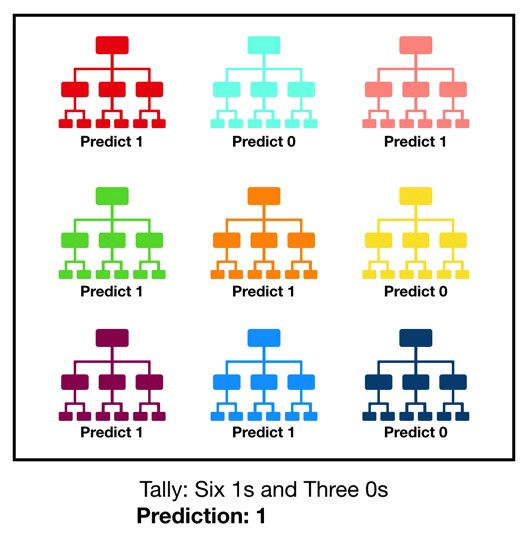

A random forest works by utilising the same concept as a decision tree, however, as it's name suggests, it is actually made up of a number of decision trees.

This method randomly generates a set of decision trees, and as we can see from the above image, it can then tally the outcomes of the overall set and make a decision based on majority outcome.

Because of this element of randomness this method generally tends to be more effective than any individual decision tree.

In [16]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

cross_val = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

#[4], [3]

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       143
           1       0.80      0.79      0.79       172
           2       1.00      0.20      0.33         5

    accuracy                           0.78       320
   macro avg       0.85      0.59      0.63       320
weighted avg       0.78      0.78      0.78       320

0.7927657480314961


And as predicted, the random forest has a much higher rate of accuracy, and comes in around the top at close to 80%.

So why then would we ever chose a decision tree? Well sometimes they are more suited to smaller data sets where it is important to be able to interpret the process a bit more. Decision trees keep things at a simpler level, and are also faster and more lightweight.

Random forests are most useful on large datasets, where interpretation doesn't need to be too granular and training time isn't in short supply.

[9]

## Stochastic Gradient Descent:

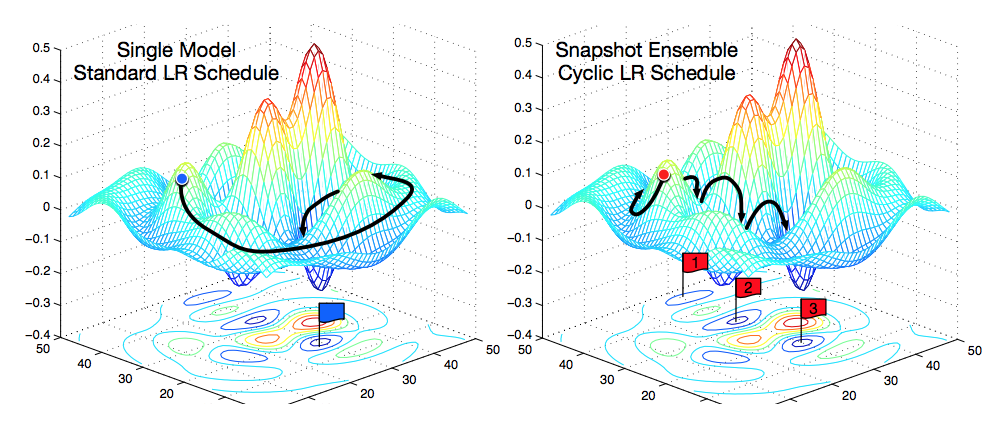

Stochastic Gradient descent attempts to minimize a loss function to classify data. 

Firstly, what is gradient descend? It is a popular optimization technique used in machine learning, and can be used with most (if no all) the learning algorithms. A gradient is the slope of a function which measures the degree of change ofa variable in response to the changes of another. Mathematically, Gradient Descent is a convex function whose output is the partial derivative of a set of parameters of its inputs. The greater the gradient, the steeper the slope.

Starting from an initial value, Gradient Descent is run iteratively to find the optimal values of the parameters to find the minimum possible value of the given cost function. 

There are 3 types of gradient descent: Batch, Mini-batch and stochastic. We will only be discussing the latter.

The work 'stochastic' means a system or a process that is linked with a random probability. Thus, as the name suggests, a few samples are selected for testing at random (rather than the whole set) and we use these samples to calculate the gradient for each iteration. The randomness is a way of lowering the number of test samples, as opposed to batch gradiesnt descent where the entire dataset is used. The reason for this is economy of time and resources; obviously a larger sample produces more accurate results, however with massive datasets this can be far too cumbersome a task to be worth the marginal increase in accuracy.

A way of thinking about it in human terms is actually really well represeted in the figures above. The function acts like gravity on a point in the data, and the lowest point is the point where the cost function is at it's lowest cost. Like a ball on a hill, as the force of the function acts on the data in all directions, he direction where the slope is steepest is the the direction the ball (or point on the slope) will move. Then, as the ball moves to the bext point, the force again acts upon it and pulls the ball in the direction of steepest slope to the next point. 

On a 2 dimensional graph this would be like the slope of a function. On a multidimensional plane the same concep is applied to several slopes at the same time, creating an optimized descent through all functions to the collecive point of lowest cost.

It is a very popular and common algorithm, used in cpuntless machine learning algorithms. It is probably best known for the fact that it forms the basis of Neural Networks. Let's see it in action:

[10]

In [23]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)
print(classification_report(y_test, pred_sgd))

cross_val = cross_val_score(estimator=sgd, X=x_train, y=y_train, cv=10)
print(cross_val.mean())

#[4]

C:\Users\codes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      0.75      0.70       143
           1       0.74      0.67      0.70       172
           2       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.46      0.47      0.47       320
weighted avg       0.69      0.69      0.69       320

0.7036109744094488


So as we can see the most effective classifiaction algorithm in this particular case was the random forest algorithm. We have learned this ourselves through implementing the solutions and comparing the results, however as we have seen previously, time and ecomomy of resources is an important factor. So then, how do we best decide which algorithms to use on our data before we even begin? 

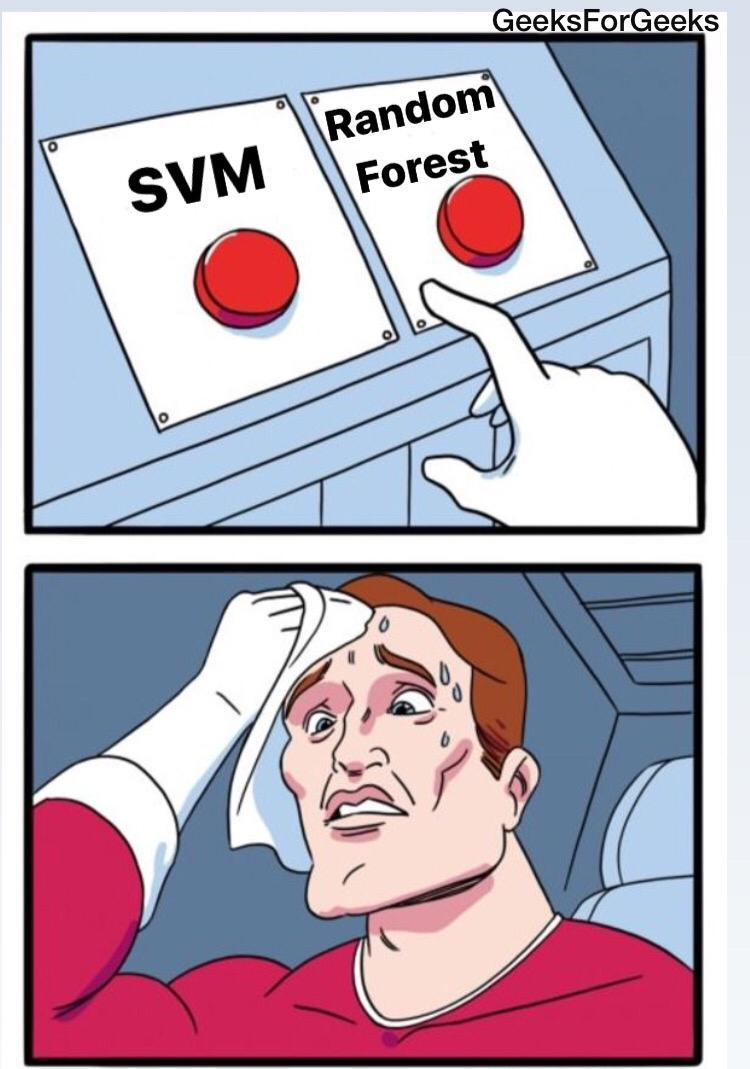

[16]

Again, there is no standardised rule of thumb that fits all datasets unfortunately. However, there a re several factors which we can use as considerations before we launch blindly into the darkness:

##### 1: The size of the training data:
Often the data available is more constrained than we would like, for instance if the set is small in relation to the complexity of the data itself. In these cases, it is best to choose algorithms with high bias & low variance., such as Linear Regression, Naive Bayes or Linear SVM.

If the training dataset is large enough in comparison to the number of data features, (and especially in the case of extremely large datasets), we would choose an algorithm with low bias/high variance, such as K-Nearest Neighbors, Decision trees or Kernel SVM.

**Bias** is the simplifying assumptions made by the model to make the target function easier to approximate.

**Variance** is the amount that the estimate of the target function will change given different training data. [12]

##### 2: Accuracy and Interpretability of output:
As described above with DTs vs RFs, the level of abstraction from the algorithm is often an important factor when deciding which algorithm to use. Sometimes accuracy will be sacrificed for interpretability to bring the person reporting closer to the nature and behaviours within the data. The two extremes of this decision scale would often be refered to as: restriced<->flexible.


##### 3: Speed or Training Time:
Deciding which algorithm to use is most often driven by these two factors more than any other. Logistic and Linear regression are most often chosen over Neural Networks or RFs simply because they take less time, as well as having far fewer parameters to tune and train.

##### 4: Linearity:
This basically refers to the number of dimesions, (or dimensional analog) needed to draw an accurate line of classification, as well as how straight that line is. Linear regression is great when the line is straight and data classes fall easily either side of it, however if the data is not considered linear, this is where Neuro-Networks RFs and SVM would be most useful.

##### 5: Number of features:
Often times data sets can have a large number of features in comparison to the number of useful datapoints contained within. This can muddy the waters when it comes to drawing conclusions from the data, and can make training times incredibly long. In these cases SVM would be better suited where there is large feature space and lesser observations.

In these cases a common algorithm call PCA (Principal Component Analysis) is commonly used. It is an unsupervised machine learning algorithm used across a variety of applications: exploratory data analysis, dimensionality reduction, information compression and data de-noising. This can e used to reduce dimensionality and select which features are needed and which are not.

The following is an incredibly informative infographic which will should be able to help with deciding which algorithm is best for a given data type:

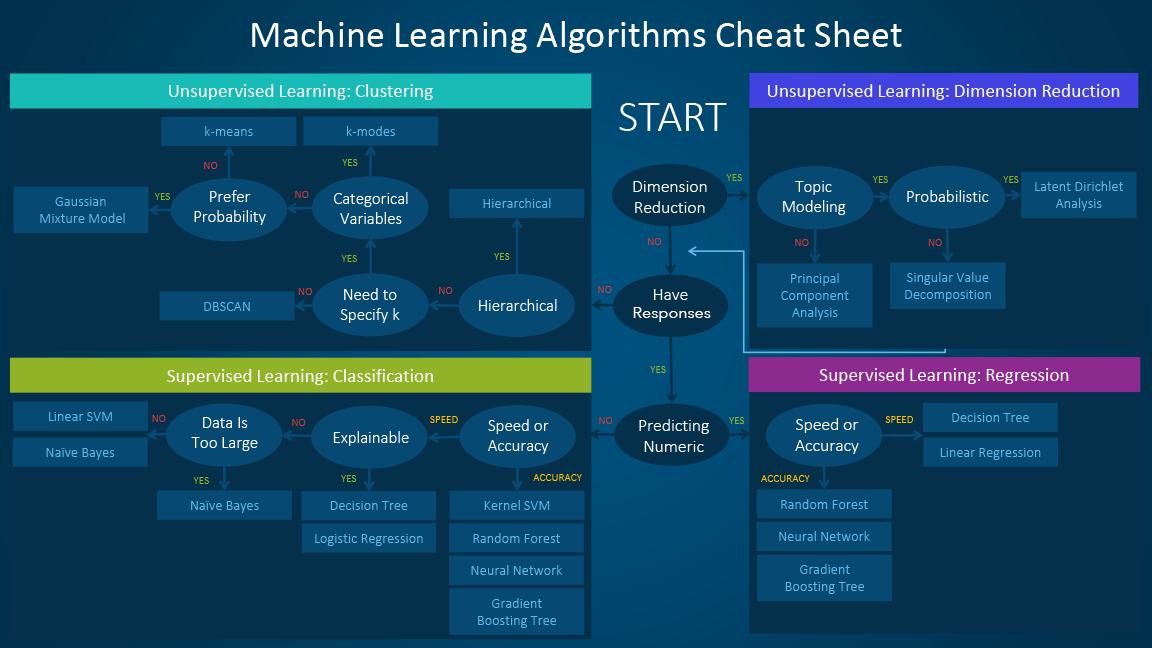

[15]

# Optimisation:

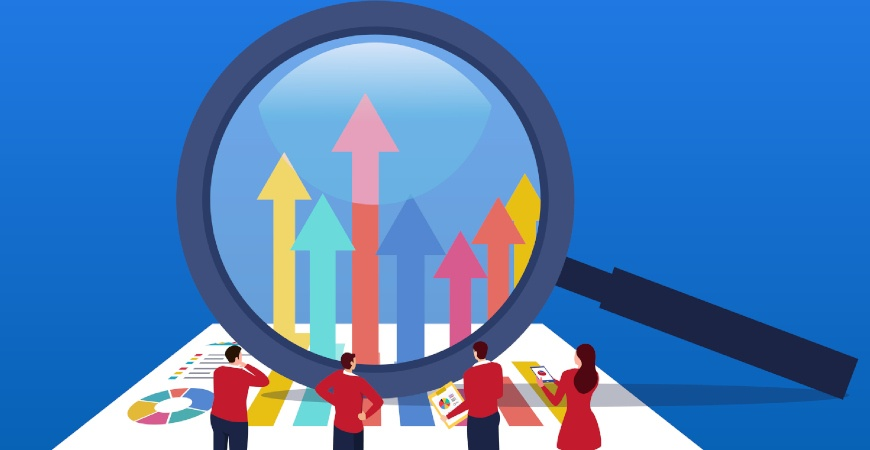

Finally, now that we have decided upon our classification algorithm, we can try and optimize our results. Here we basically tweak the paraeters until we find a way of fine tuning the algorithm itself to garner more accurate results. 

The parameters we can tweak are te number of trees used, the number of features to consider in each split & number of levels in a given tree. We can then cross reference the results and see what we can comeup with.

In [25]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

# random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42)

# print(rf_optimized.best_params_)

rf_optimized.fit(x_train, y_train)
pred_optimized = rf_optimized.predict(x_test)
print(classification_report(y_test, pred_optimized))

#[4]

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   6.4s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   3.7s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True, total=   4.2s
[CV] n_estimators=577, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=577, min_sa

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=98, bootstrap=False, total=   6.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   6.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   7.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=False, total=   7.4s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=21, bootstrap=True 
[CV]  n_estimat

[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   5.2s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   4.9s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=98, bootstrap=False, total=   5.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=50, mi

[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.8s
[CV] n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=54, bootstrap=False 
[CV]  n_estimators=50, min_samples_s

[CV]  n_estimators=788, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=54, bootstrap=True, total=   6.7s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   4.8s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   4.4s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   4.3s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=50, min_sam

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   6.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   6.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=98, bootstrap=False, total=   6.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False, total=   2.5s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=32, bootstrap=False 
[CV]  n_estimators=366,

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   1.9s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True, total=   2.2s
[CV] n_estimators=261, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=261, min_samples_

[CV]  n_estimators=261, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=32, bootstrap=True, total=   1.8s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   6.8s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   6.6s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=True, total=   7.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimators=1000, min_samp

[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   6.9s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   6.2s
[CV] n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=87, bootstrap=True, total=   6.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False, total=   8.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=21, bootstrap=False 
[CV]  n_estimators=1000, mi

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 19.6min finished


              precision    recall  f1-score   support

           0       0.77      0.79      0.78       143
           1       0.80      0.81      0.80       172
           2       0.00      0.00      0.00         5

    accuracy                           0.79       320
   macro avg       0.52      0.53      0.53       320
weighted avg       0.78      0.79      0.78       320



C:\Users\codes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


So here we can see that even with opimisation the result is only marginally imporved. Optimizastion is a great way of getting the most accurate results from your model, however in the same vein of thought as other factors to consider when choosing a model, the nature of the data and model itself might mean that the actual value of optimization. If time ad resources are limited and you can afford a slightly larger margin of error, it may not be worth your time.

# Bibliography:

[1] https://nbviewer.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/iris-classification.ipynb

[2]https://archive.ics.uci.edu/ml/datasets/Wine+Quality 
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

[3] https://www.youtube.com/watch?v=BqDae4GPnu0

[4] https://nbviewer.org/github/kying18/wine-classification/blob/master/red%20wine%20classification.ipynb

[5] https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer

[6] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

[7]https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

[8] https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

[9] https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

[10] https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/#:~:text=Hence%2C%20in%20Stochastic%20Gradient%20Descent,the%20gradient%20for%20each%20iteration.

[11] https://www.kdnuggets.com/2020/05/guide-choose-right-machine-learning-algorithm.html

[12] https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/#:~:text=Bias%20is%20the%20simplifying%20assumptions,change%20given%20different%20training%20data.

[13] https://medium.datadriveninvestor.com/supervised-vs-unsupervised-machine-learning-732d49413986

[14] https://venturebeat.com/2022/01/02/the-current-state-of-mlops-for-machine-learning-engineers/

[15] https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/

[16] https://www.geeksforgeeks.org/choosing-a-suitable-machine-learning-algorithm/
 [17] https://www.youtube.com/watch?v=UkzV1e4tRyk